In [158]:
import warnings
warnings.filterwarnings('ignore')

In [159]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

1. Import libraries and read the dataset.
2. Explore Data Analysis. Find out how one variable related to other and distributions of data.
3. State your insights.
4. Build a linear regression model to predict the house prices
5. Try to find out important features or create new features to improve the performance for your model.
6. Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.
PS - You can change the order of steps or add additional steps to figure out the best solution.



In [160]:
df_county = pd.read_csv("kc_house_data-1.csv")

In [161]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [162]:
df_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [163]:
#Removing id column
df_county = df_county.drop("id",axis=1)

In [164]:
#Removing date column
df_county = df_county.drop("date",axis=1)

In [165]:
df_county.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [166]:
df_county.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values

In [167]:
df_county.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


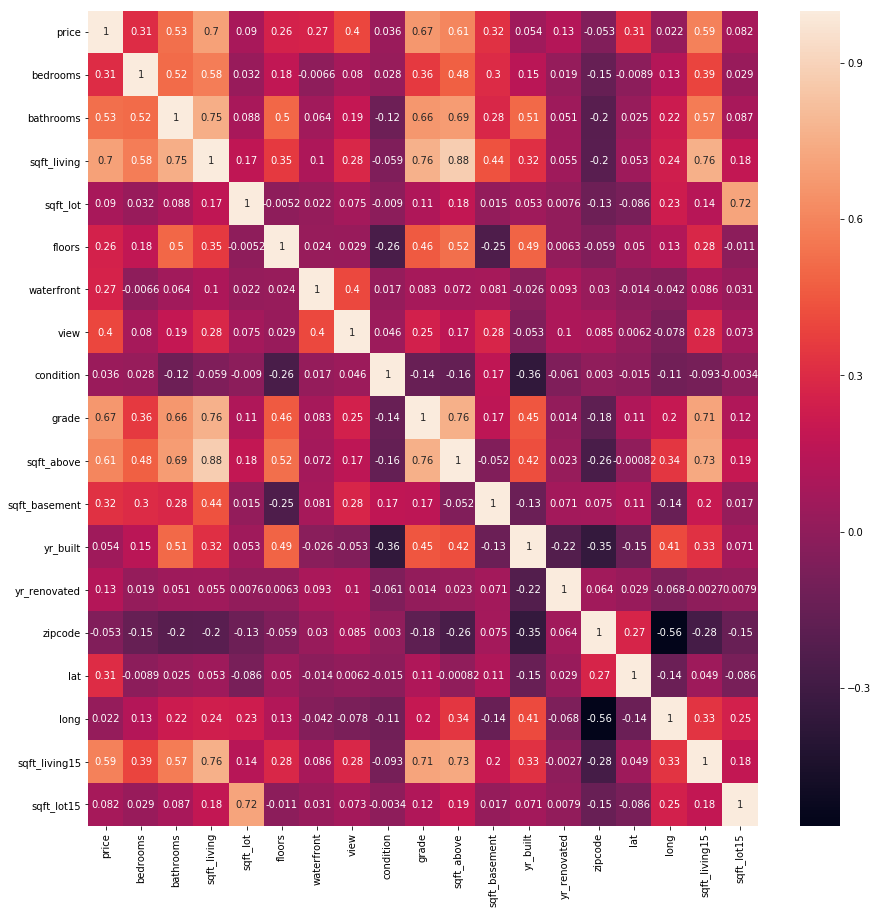

In [168]:
#Finding correlation through heatmap
corrmat = df_county.corr()
pyplot.subplots(figsize = (15,15))
sns.heatmap(corrmat, annot=True)

columns: sqft_lot, condition, yr_built, zipcode, long and sqft_lot15 have the least correlation with 'price'

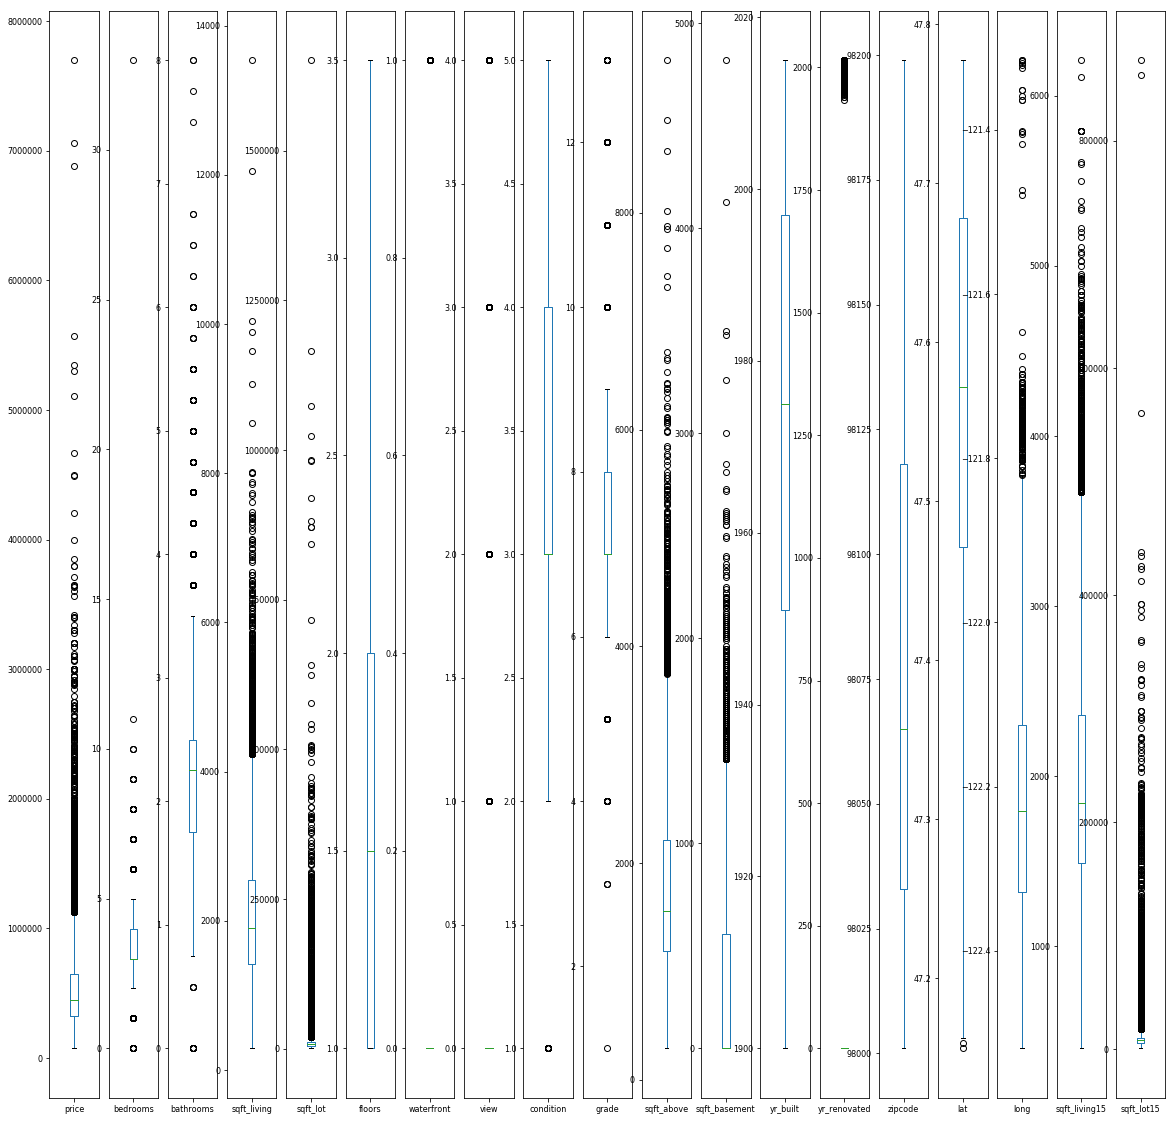

In [169]:
# box and whisker plots
df_county.plot(kind='box', subplots=True, fontsize=8, figsize=(20,20))
pyplot.show()

Many columns have outliers

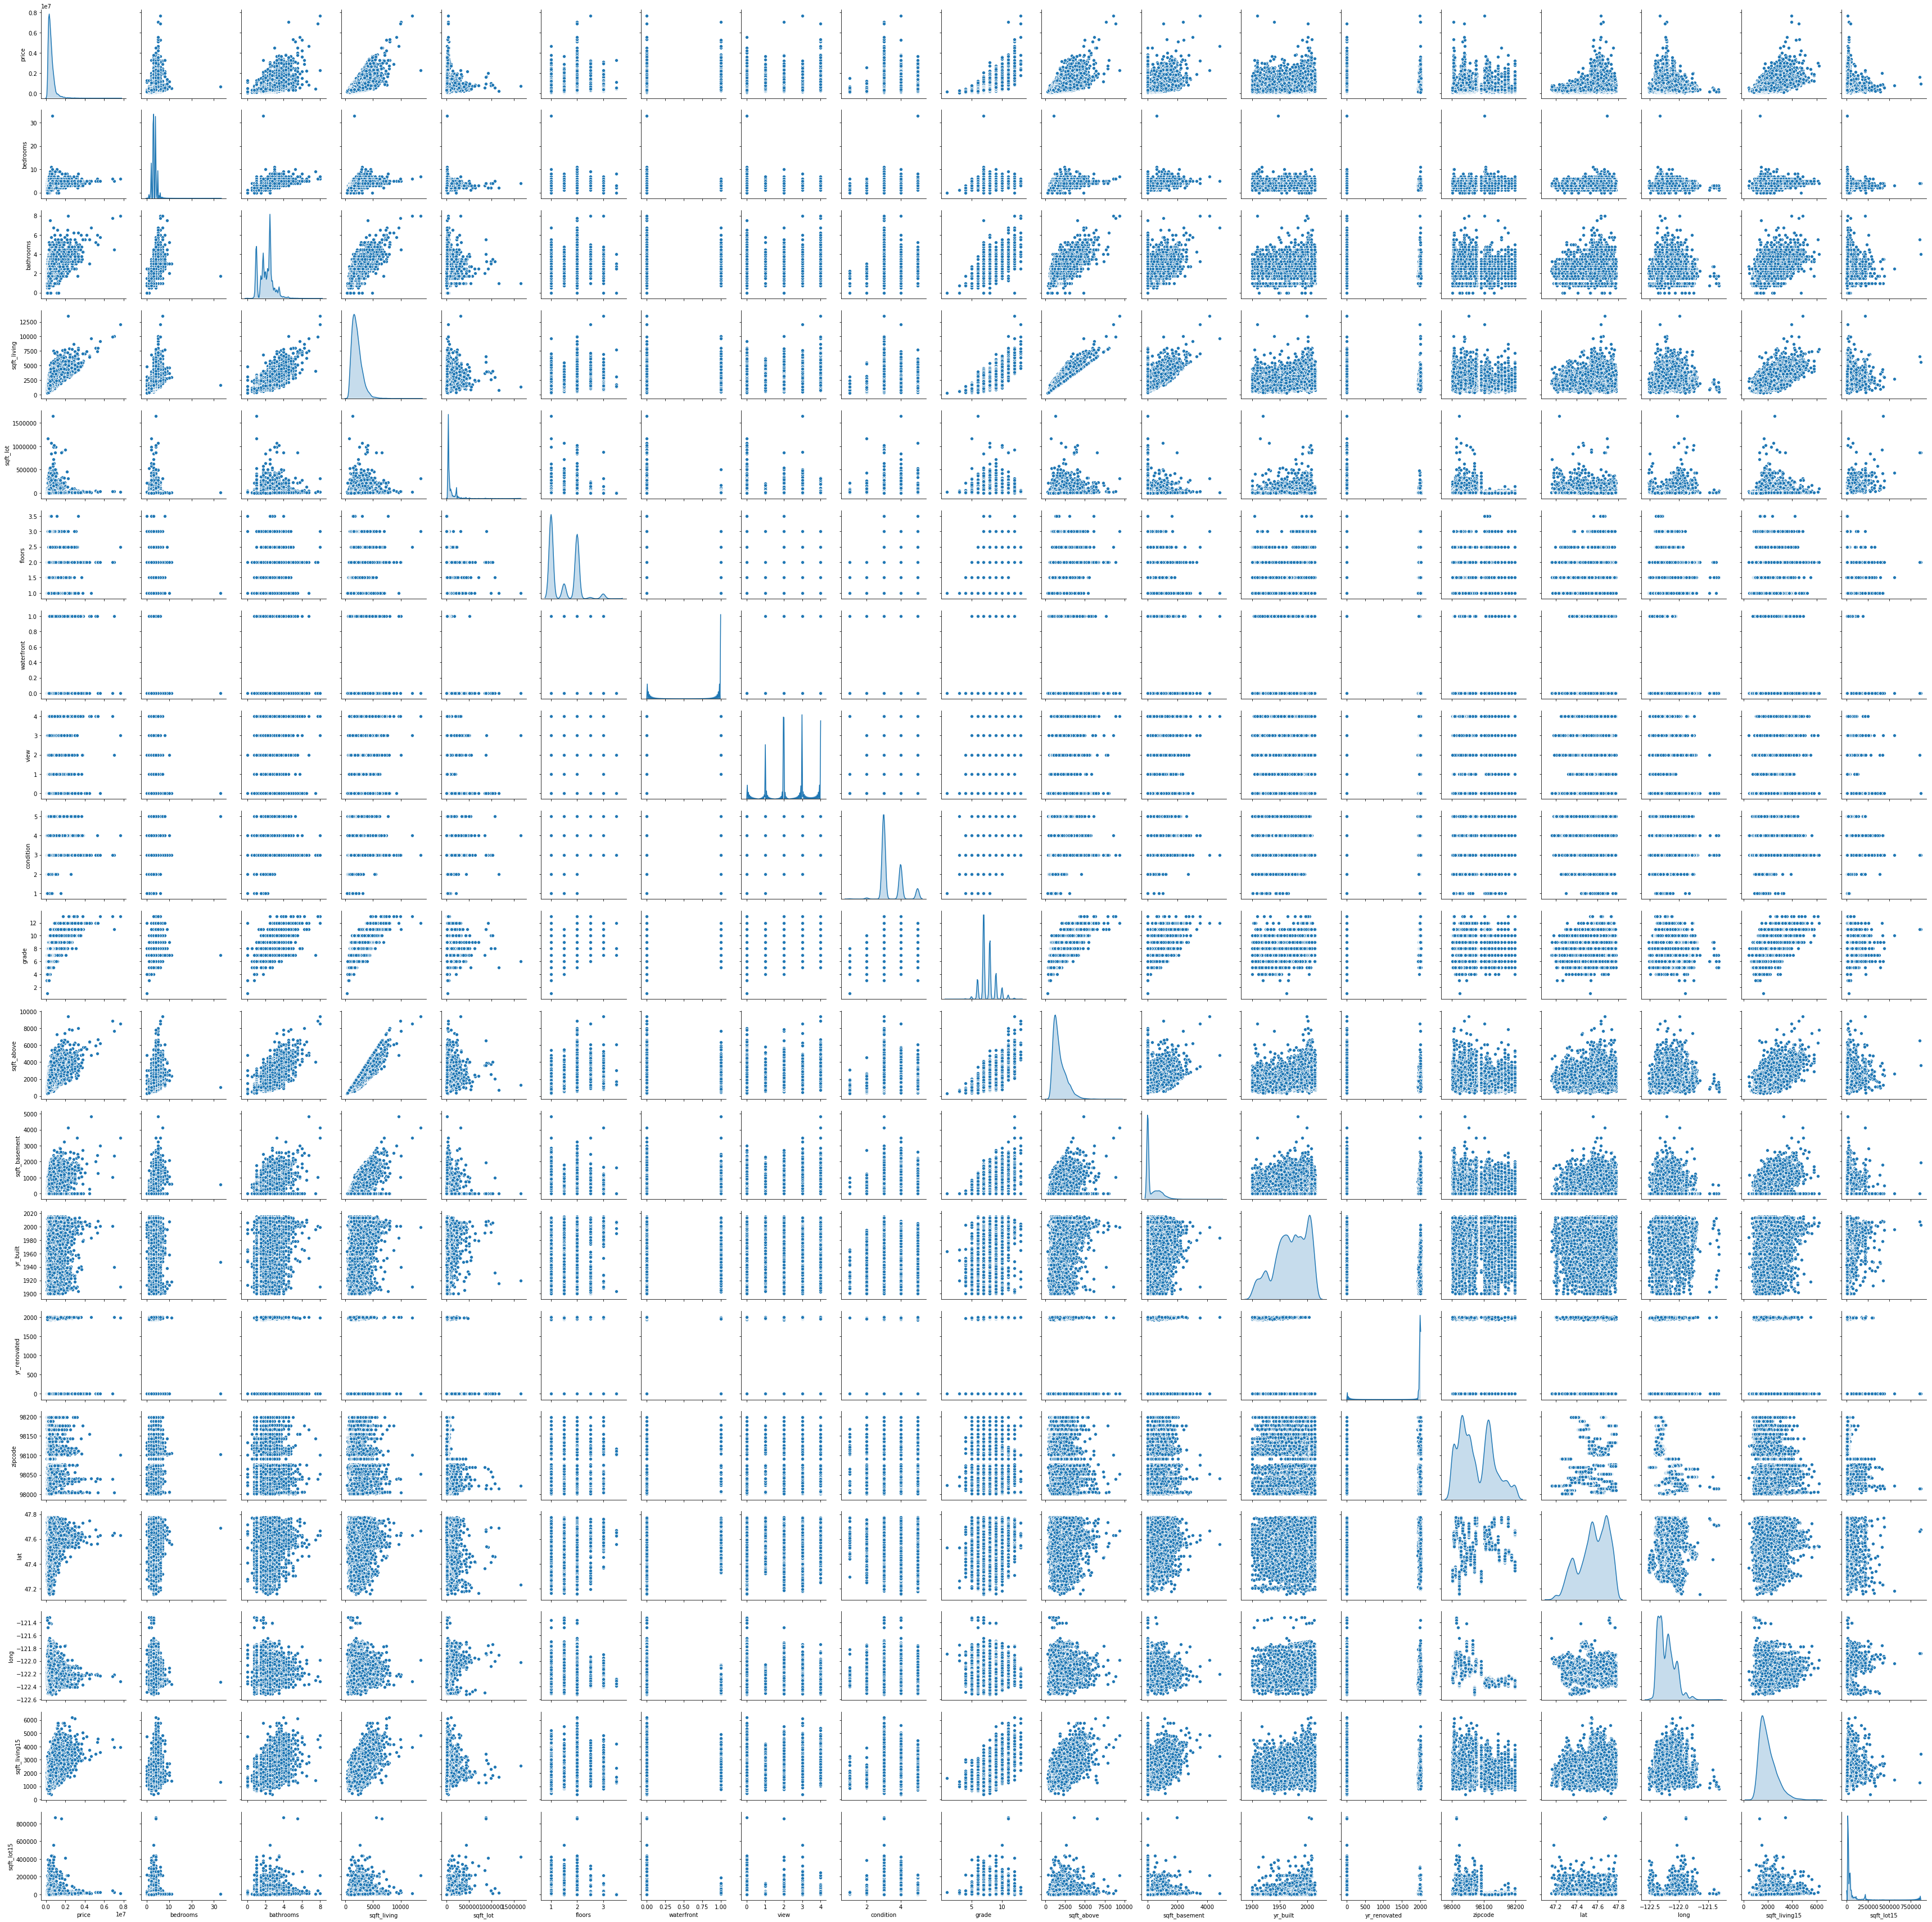

In [170]:
sns.pairplot(df_county, diag_kind='kde')

In [171]:
from scipy.stats import zscore

df_county_attr = df_county.drop(columns=['price'],axis=1)

df_county_attr_z = df_county_attr.apply(zscore)

# # A simple function that takes as input a column, find's its median, identifies outliers, replaces outliers with median     
def replace(x):
    median, std = x.median(), x.std()  #Get the median and the standard deviation of every column
    outliers = (x - median).abs() > 2*std # Subtract median from every member of each column. Take absolute values > 2std
    x[outliers] = x.median()       
    return x

df_county_attr_z_corrected = df_county_attr_z.apply(lambda x:x.transform(replace)) # transforming raw data using replace function
df_county_treated = df_county_attr_z_corrected.join(pd.DataFrame(df_county['price']))  # joining back the numeric and non-numeric columns

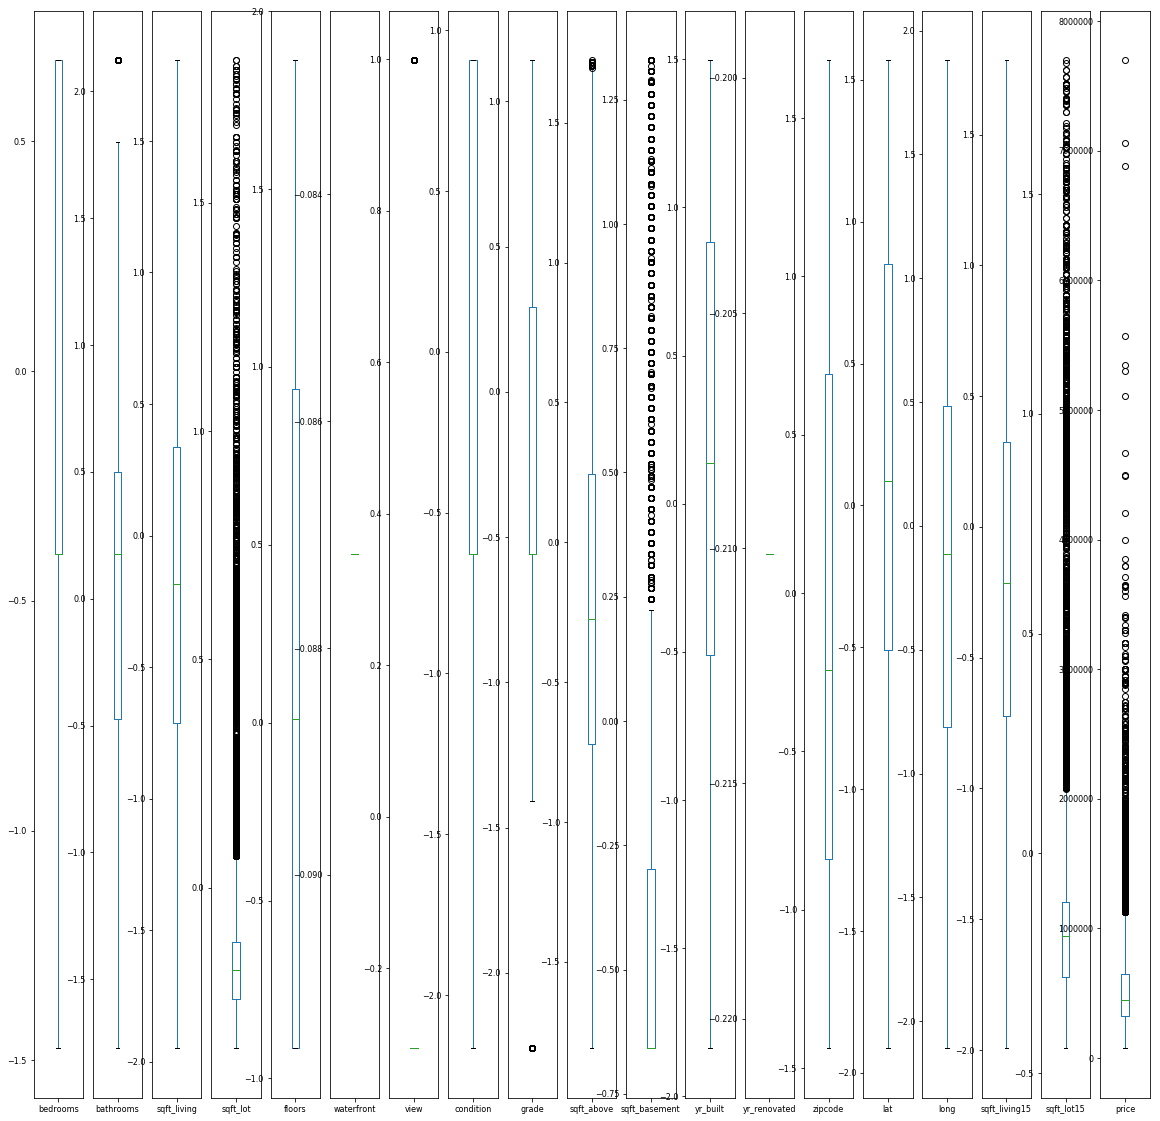

In [172]:
# box and whisker plots
df_county_treated.plot(kind='box', subplots=True, fontsize=8, figsize=(20,20))
pyplot.show()

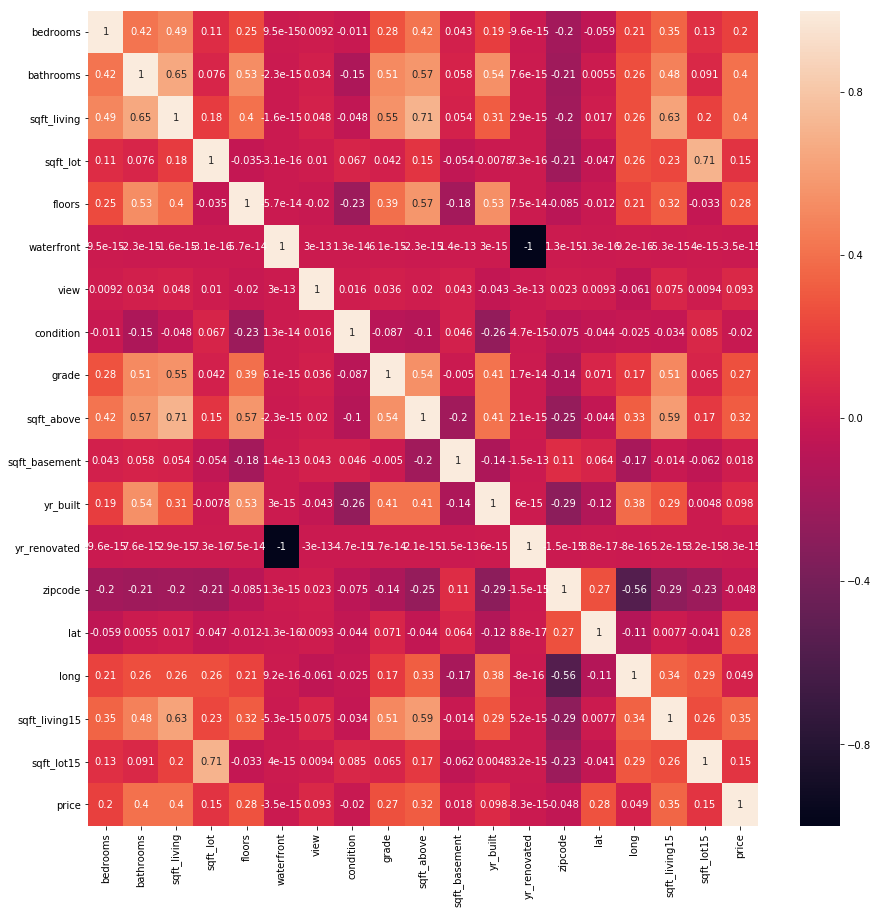

In [173]:
corrmat_treated = df_county_treated.corr()
pyplot.subplots(figsize = (15,15))
sn.heatmap(corrmat_treated, annot=True)

using the scaled and treated data, the accuracy will go down even further(tried) so ignoring it for now

In [174]:
X = df_county.drop('price', axis=1)
y = df_county['price']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=7)

In [176]:
regression_model = LinearRegression()

In [177]:
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [178]:
print(regression_model.score(X_train, y_train))

0.7061384695430191


In [179]:
print(regression_model.score(X_test, y_test))

0.6834535922783391


In [180]:
# Train MSE
predictedPrice = regression_model.predict(X_train)
mean_squared_error(predictedPrice, y_train)

39948685329.62595

In [181]:
# Test MSE
predictedPrice_test = regression_model.predict(X_test)
print(mean_squared_error(predictedPrice_test, y_test))

41799474196.79218


In [182]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)  


In [183]:
# Train MSE with scaled data
mean_squared_error(regression_model.predict(X_train_std), y_train)

29080937558550.88

In [184]:
# Test MSE with scaled data
X_test_std = sc.fit_transform(X_test)

mean_squared_error(regression_model.predict(X_test_std),y_test)

29116843789127.887

Using the scaled data, the mse is going up

# FEATURES SELECTION

In [185]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [186]:
# Build step forward feature selection
sfs1 = sfs(regression_model, k_features=5, forward=True, scoring='r2', cv=5)

In [187]:
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [188]:
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.51464898, 0.52380901, 0.45706749, 0.46291428, 0.50689823]),
  'avg_score': 0.4930675981144613,
  'feature_names': ('2',),
  'ci_bound': 0.03546707497235638,
  'std_dev': 0.027594589261599866,
  'std_err': 0.013797294630799935},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57428717, 0.58597449, 0.54282654, 0.55005357, 0.58672817]),
  'avg_score': 0.5679739869036622,
  'feature_names': ('2', '14'),
  'ci_bound': 0.0234834273839637,
  'std_dev': 0.018270904313935073,
  'std_err': 0.009135452156967538},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.62436586, 0.62859471, 0.58807061, 0.59016288, 0.62963526]),
  'avg_score': 0.6121658611507522,
  'feature_names': ('2', '6', '14'),
  'ci_bound': 0.024309598782354946,
  'std_dev': 0.018913693729641252,
  'std_err': 0.009456846864820626},
 4: {'feature_idx': (2, 6, 8, 14),
  'cv_scores': array([0.64101027, 0.65055668, 0.61956954, 0.62501689, 0.65145137]),
  'avg_score': 0.637520

In [189]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

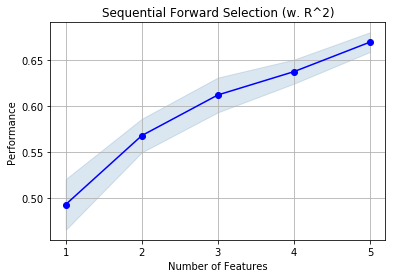

In [190]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [191]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 6, 8, 11, 14]


In [192]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['sqft_living', 'view', 'grade', 'yr_built', 'lat']


# Build full model with selected features

In [193]:
regression_model.fit(X_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
y_train_pred = regression_model.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % regression_model.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.671


In [195]:
y_test_pred = regression_model.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % regression_model.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.656


In [196]:
# predictedPrice = regression_model.predict(X_train[subsetColumnList])
mean_squared_error(regression_model.predict(X_train[subsetColumnList]), y_train)

44718023792.140945

In [197]:

print(mean_squared_error(regression_model.predict(X_test[subsetColumnList]), y_test))

45487592017.77577


# K Fold Cross validation

In [198]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [199]:
kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(regression_model, X_train, y_train, cv=kfold, scoring=scoring)

In [200]:
print(-cv_results.mean(), cv_results.std())

40241708421.57921 6607182506.380094


In [201]:
results = cross_val_score(regression_model, X_train, y_train, scoring='r2', cv=kfold)
print("R square: %.3f (%.3f)" % (-results.mean(), results.std()))

R square: -0.703 (0.023)


In [202]:
for i in range(2,20):
    kfold = KFold(n_splits=i, random_state=seed)
    cv_results = cross_val_score(regression_model, X_train, y_train, cv=kfold, scoring=scoring)
    print("K:{} and Mean: {} and Std: {}".format(i,-cv_results.mean(), cv_results.std()))


K:2 and Mean: 40445238710.67352 and Std: 1720637384.279995
K:3 and Mean: 40453079198.56555 and Std: 4461369811.661628
K:4 and Mean: 40251206117.2624 and Std: 4247123627.04212
K:5 and Mean: 40231503824.05334 and Std: 4414926842.735031
K:6 and Mean: 40309357813.426216 and Std: 5638328348.152947
K:7 and Mean: 40187282585.95314 and Std: 3369355169.588281
K:8 and Mean: 40285561398.5771 and Std: 5578810008.2532215
K:9 and Mean: 40212499398.917145 and Std: 5908444924.173915
K:10 and Mean: 40241708421.57921 and Std: 6607182506.380094
K:11 and Mean: 40256714826.00921 and Std: 6058890490.842634
K:12 and Mean: 40282784276.21924 and Std: 7087410799.251489
K:13 and Mean: 40203499378.83583 and Std: 7197792022.670232
K:14 and Mean: 40274616132.92341 and Std: 7285331310.548688
K:15 and Mean: 40211890105.69964 and Std: 7169922215.753809
K:16 and Mean: 40299458600.906395 and Std: 9142394222.2577
K:17 and Mean: 40226704356.90273 and Std: 7825328256.627967
K:18 and Mean: 40235015564.501854 and Std: 803999

In [203]:
for i in range(2,20):
    kfold = KFold(n_splits=i, random_state=seed)
    cv_results = cross_val_score(regression_model, X_train, y_train, cv=kfold, scoring='r2')
    print("K:{} and Mean: {} and Std: {}".format(i,-cv_results.mean(), cv_results.std()))

K:2 and Mean: -0.7025803095627696 and Std: 0.003210016508433222
K:3 and Mean: -0.7020155747283816 and Std: 0.012121666245152898
K:4 and Mean: -0.703212699429272 and Std: 0.013410705644675143
K:5 and Mean: -0.7037877235584994 and Std: 0.015529987334625486
K:6 and Mean: -0.7026714972079678 and Std: 0.016246325099668207
K:7 and Mean: -0.7036718898728173 and Std: 0.018214491720634093
K:8 and Mean: -0.7008439186518449 and Std: 0.026956301041522832
K:9 and Mean: -0.7024770845807586 and Std: 0.019682403239629005
K:10 and Mean: -0.7026445286253701 and Std: 0.023065114863791276
K:11 and Mean: -0.7019134026538036 and Std: 0.018035012307607793
K:12 and Mean: -0.7016200754094397 and Std: 0.023334509185785914
K:13 and Mean: -0.7037331544478393 and Std: 0.02607272638144497
K:14 and Mean: -0.7017863421367403 and Std: 0.02406571728362349
K:15 and Mean: -0.7027710657320679 and Std: 0.024613385172166484
K:16 and Mean: -0.702208348448661 and Std: 0.03245083307567396
K:17 and Mean: -0.7027768693273181 and

Not much changes in mean and std with change in k values for k fold